In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from trajectories.fitting import *
from trajectories.filtering import *
from visualization.graph import visualize_trajectory_graph
from visualization.video import *

%load_ext autoreload
%autoreload 2

In [235]:
# sources = ['60864', '60924']
sources = sorted(os.listdir('../volleyball_videos/0/'))[:10]

candidates = []
for source in sources:
    candidates.append(pd.read_csv(f'../volleyball_ball_annotation/0/{source}.txt', sep=' ', names=['x', 'y']).values)
candidates = np.concatenate(candidates)[:, np.newaxis, [1,0]] # concatenate sources and invert x and y
candidates.shape

(410, 1, 2)

In [257]:
import time

t0 = time.time()
fitting_info = fit_trajectories(candidates, np.ones(len(candidates)), seed_radius=100, d_threshold=30)
trajectory_graph = build_trajectory_graph(fitting_info)
path_mapping = build_path_mapping(fitting_info, find_shortest_paths(trajectory_graph))
t1 = time.time()

t = t1-t0
print(t)
print(1/t)

Fitting trajectories:
{'seed_radius': 100, 'd_threshold': 30, 'N': 10}
410 of 410
Done.
Building trajectory graph:
410 of 410
Done.
0.07675695419311523
13.028135502668183


21


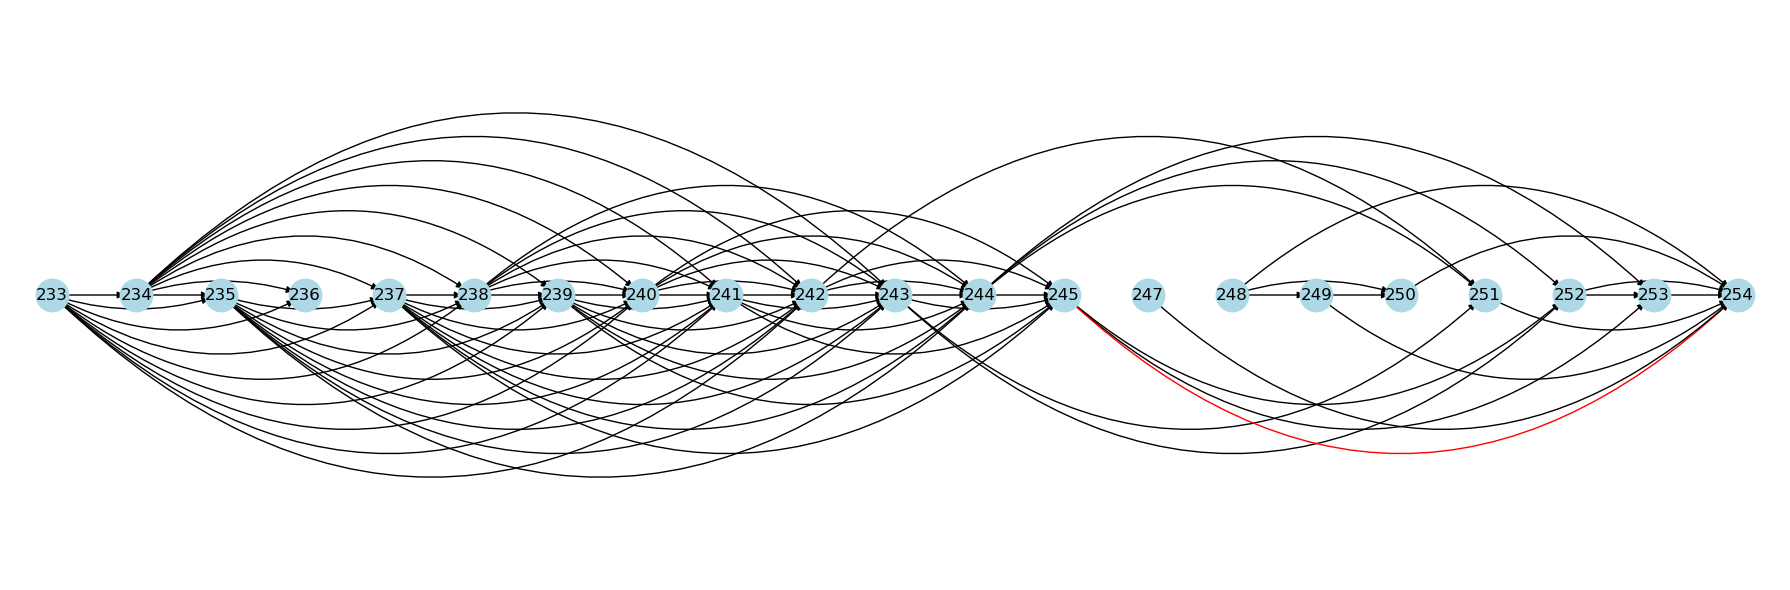

In [262]:
visualize_trajectory_graph(trajectory_graph, whole_graph=False)
plt.show()

In [263]:
# sources_paths = f'../volleyball_videos/0/{sources}/'
# output_name = f'{sources}.mp4'
sources_paths = [f'../volleyball_videos/0/{src}/' for src in sources]
output_name = 'out.mp4'

create_trajectory_video(candidates, sources_paths, output_name, fitting_info, path_mapping, fps=10)

Rendering video
source 1 of 10:


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


writing frame 41 of 41                                                          
Finished frames.
source 2 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 3 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 4 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 5 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 6 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 7 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 8 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 9 of 10:
writing frame 41 of 41                                                          
Finishe

# Triggers

In [264]:
seed_frames = [d['k_seed'] for d in fitting_info['trajectories']]

starting_frame = fitting_info['trajectories'][0]['k_seed']

velocities = []
v = np.array([0,0])
for frame_index in seed_frames:
    pm = path_mapping[frame_index]
    if pm is None:
        velocities.append(v)
        continue
    trajectory_info = fitting_info['trajectories'][pm]

    t = frame_index - trajectory_info['k_min']

    v0 = trajectory_info['v']
    a = trajectory_info['a']

    v = v0 + a*t
    velocities.append(v)

velocities = np.vstack(velocities)
accelerations = np.vstack([np.array([[0,0]]), velocities[1:]-velocities[:-1]])

In [265]:
acceleration_angles = np.arctan2(accelerations[:,0], accelerations[:,1])/np.pi*180
acceleration_norms = np.linalg.norm(accelerations, axis=1)
norms_ratio = acceleration_norms[1:]/np.where(acceleration_norms[:-1]==0, 1, acceleration_norms[:-1])
norms_ratio = np.concatenate([[0], norms_ratio])

print(np.where(norms_ratio>5)[0])
print(np.where(acceleration_angles<0)[0])

triggers = np.where((norms_ratio>5) & (acceleration_angles<0))[0]
print(triggers)

[ 20  34  42  61  82  97 102 115 146 168 186 202 205 223 246 263 274 304
 319 328 346 362 364 383 399]
[ 16  20  51  61  82  97 102 132 141 146 177 186 223 245 263 274 277 304
 343 346 373 381 383]
[ 20  61  82  97 102 146 186 223 263 274 304 346 383]


In [266]:
# sources_paths = f'../volleyball_videos/0/{sources}/'
# output_name = f'{sources}.mp4'
sources_paths = [f'../volleyball_videos/0/{src}/' for src in sources]
output_name = 'out_trig.mp4'

create_trajectory_video(candidates, sources_paths, output_name, fitting_info, path_mapping, fps=10, trigger_frames=triggers)

Rendering video
source 1 of 10:


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


writing frame 41 of 41                                                          
Finished frames.
source 2 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 3 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 4 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 5 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 6 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 7 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 8 of 10:
writing frame 41 of 41                                                          
Finished frames.
source 9 of 10:
writing frame 41 of 41                                                          
Finishe